## Final Project Submission
### Student name: Felix Limo.
### Student pace: part time.
### Scheduled project review date/time:
### Instructor names: Samuel Karu & Daniel Ekale.

# 1.0 Introduction

This project involves analysis of shipping data to draw insights and build a predictive model on future deliveries if they will be delivered 'On-time' or 'Delayed'. The research follows cross industry standard procedures (CRISP-DM) methodlogy fo the shipping industry(product supply chain).

# 2.0 Business Understanding

# 2.1 Objective

Company involved in trade of electronic items in the international market is interested in the analysis of its data in customer database to draw insights and apply machine learning techniques  for predictive analytics. This aimed at optimizing its resources towards improving operational efficiency in mesting customer demands.

# 3.0 The Data

The dataset for analysis 'E-Commerce Shipping Data' was drawn from; https://www.kaggle.com/datasets/prachi13/customer-analytics on Product Shipment Delivery to Meet E-Commerce Customer Demand.

### Content
The dataset used for model building contained 10999 observations of 12 variables.

The data contains the following information:

**ID:** ID Number of Customers.

**Warehouse block:** The company has big Warehouse which is divided into block; A,B,C,D,E.

**Mode of shipment:** The company delivers products either through Ship, Flight or Road.

**Customer care calls:** The number of the customer enquiry calls.

**Customer rating:** Customer rating on the company delivery. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product:** Cost of the product in US Dollars.

**Prior purchases:** The number of prior purchases.

**Product importance:** Product categorization into low, medium, high.

**Gender:** Male and Female.

**Discount offered:** Discount offered on that specific product.

**Weight in gms:** It is the weight in grams.

**Reached on time:** It is the target variable, where 0 Indicates that the product has NOT reached on time and 1 indicates it has reached on time.

# 3.1 Data Understanding 



## Data Preview

This is important  as it provides a snapshot of the type of information typically available in an e-commerce company's customer database.


### *Import python libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

### *Load and read dataset*

In [2]:
#load dataset to dataframe df
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Desribe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [4]:
# Check on the shape
df.shape

(10999, 12)

In [5]:
# Check on data info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### *Observations*

* The dataset has 1099 rows and 12 columns,
* It has 8 numerical features and 4 object features, however the target variable dtype indicates int64 but actually is categorical,
* Has equal number of non_null counts in all columns, indicates that there are no missing values(for further investigation)

# 3.2 Redefining Problem Statement

The e-commerce company has accumulated extensive shipping data related to its product deliveries. The company aims to leverage this shipping data to optimize its logistics, enhance customer satisfaction, and improve overall operational efficiency. However, the company faces challenges in understanding key shipping performance indicators, predicting delivery times accurately, and optimizing its resources. The company needs to derive actionable insights from its shipping data to drive business decisions related to shipping strategies and customer service.

### Objectives:
1. *Analyze and optimize shipping performance:*  Identify the factors influencing shipping delays.
2. *Customer satisfaction enhancement:* Identify areas where customer satisfaction can be improved, such as through faster delivery, and more reliable delivery windows.
3. *Cost reduction in shipping:* Explore data patterns to identify opportunities for reducing shipping costs without compromising delivery speed or customer satisfaction(note; discounts offered to incentivize sales is a cost to the company).
4. *Predict delivery times:* Develop predictive models to accurately forecast delivery times based on historical shipping data.

### Key Questions:
1. What are the main factors contributing to shipping delays?

* What variables (e.g., source location, shipping method, order volumes, etc.) have the most significant impact on the timeliness of deliveries?

2.  How do customer demographics and product preferences influence delivery experiences?

* What effects does various customer ratings and their product preferences affect delivery times ?
3. How can we reduce shipping costs while maintaining or improving service levels?

* Which shipping methods and routes are most cost-effective?

4. How can we predict accurate delivery times?

* Which features most significantly influence delivery time?
* How can historical shipping data be used to develop predictive models for more accurate delivery time estimation?

# 3.3 Metrics of success

This project is deemed successful if findings will enable recommendations on; delay factors,demographic factors affectcting delivery timelines, cost effective shipping modes and routes, and best classification model to deploy for prediction

# 4.0 Data Preparation

## 4.1 Data Cleaning

This phase involves checking on data validity, accuracy, completeness, accuracy, consistency and uniformity. 

### 4.1.1 Validity check
This achieved by checking irrelevant features and removing them or selecting the revelant features

In [6]:
#Perform validity check on data files
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


### *Observation*

We may not need ID columns and thus drop it

In [7]:
#Dropping ID column
df = df.drop('ID',axis=1)
df.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1


### 4.1.2 Data completeness
Checking for missing values and treating them. Missing values are either dropped/deleted if by so doing do not significantly impact on the clean dataset, or values imputed.

In [8]:
#Checking for missing values
df.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### *Observation*
There are no missing values

### 4.1.3 Data accuracy
Checking for outlier values in the data that distorts its accuracy. This is mitigated by drop/removing outliers

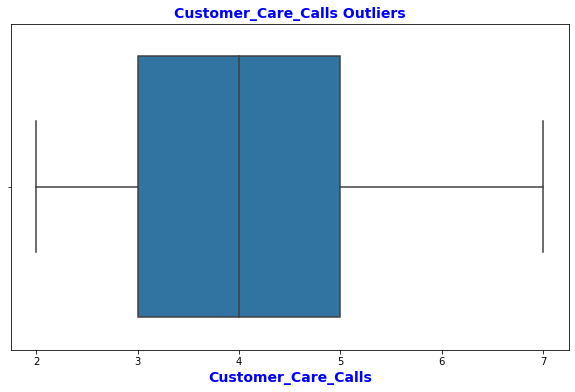

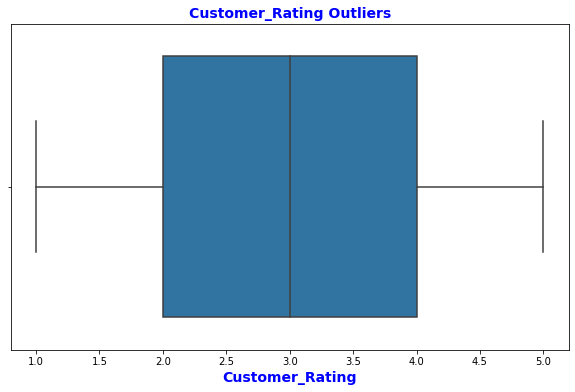

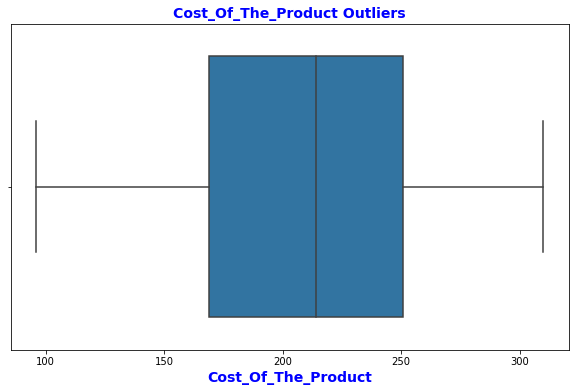

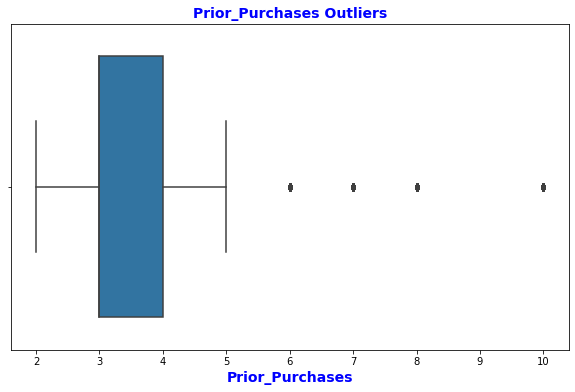

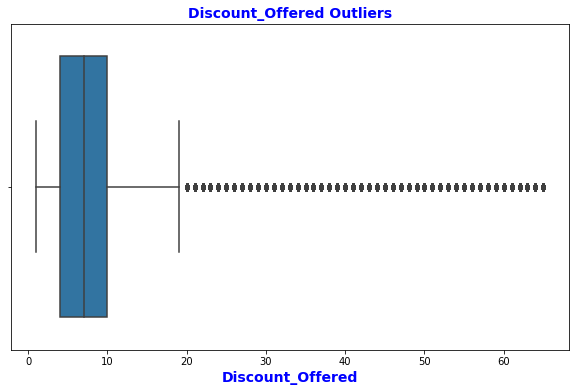

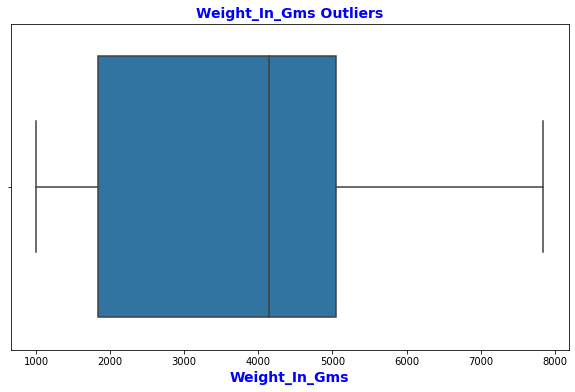

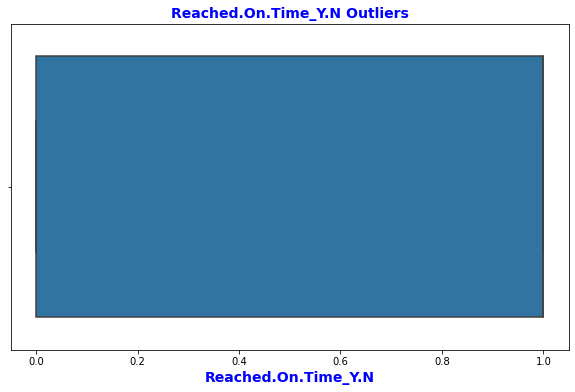

In [9]:
# Check for ouliers
num_features = df.select_dtypes(include='int64').columns

for feature in num_features:
    plt.figure(figsize= (10,6))
    sns.boxplot(x=df[feature])

    plt.title(f'{feature} Outliers'.title(), size=14, color='blue', weight='bold')
    plt.xlabel(feature.title(), size=14, color='blue', weight='bold')
    plt.show();

### 4.1.4 Data consistency
Consistency is achieved through removal of duplicates in the dataframe

In [10]:
#Check for duplicates
df.duplicated().sum()

0

### *Observation*

There are no duplicates in the data set

### 4.1.5 Data Uniformity
Involves feature engineering

In [11]:
#Clean the column titles by stripping leading/trailing spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()
df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# 5.0 Exploratory Data Analysis(EDA)

This is the process of analyzing data to reveal trends and patterns, detect anomalies, test hypotheses and check assumptions using visuals and summary statistics.Turkey,J.W(1977)

**Key goals of EDA include:**

* Understanding the data: Getting a sense of the data's distribution, range, and central tendencies. 
* Identifying patterns: Discovering trends, correlations, or anomalies within the data. 
* Checking assumptions: Verifying assumptions made about the data before further analysis or modeling. 
* Generating hypotheses: Developing potential explanations or questions based on the findings.

# 5.1 Univariate Analysis

Univariate analysis examination of single variable distribution and measures of central tendency. Objective of this analysis is to identify patterns, trends, and outliers.

Count plots,bar charts, and pie charts are used to visually represent categorical data, while histogram and boxplots are used to visualize numerical data.

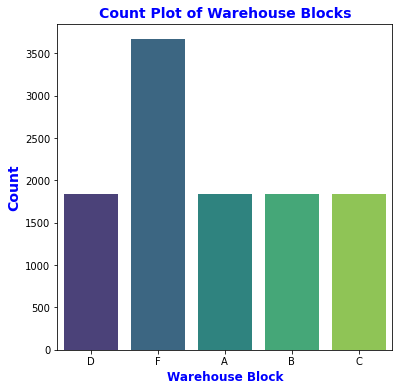

In [12]:
# Creating the count plot for the 'warehouse_block' column
plt.figure(figsize=(6, 6)) 
sns.countplot(x='warehouse_block', data=df, palette='viridis')

# Adding title and labels 
plt.title('Count Plot of Warehouse Blocks',size=14, color='blue', weight='bold')
plt.xlabel('Warehouse Block', size=12, color='blue', weight='bold')
plt.ylabel('Count',size=14, color='blue', weight='bold')

# Display the plot
plt.show()

In [13]:
# Create a function for count plot in grid layout
def countplot_grid(data, selected_columns, ncols):
    
    # Calculate the number of rows and columns for the grid
    ncols = ncols  # Number of columns    
    nrows = (len(select_cols) + ncols - 1) // ncols  # Number of rows
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 5 * nrows))

    # Flatten the axes array for easy indexing
    axes = axes.flatten()

    # Loop over the selected columns and create a countplot on each subplot
    for i, column in enumerate(selected_columns):
        sns.countplot(x=column, data=data, ax=axes[i], palette= 'Blues')
    
        # Add title and labels
        axes[i].set_title(f'{column} Distribution', size=14, color='blue', weight='bold')
        axes[i].set_xlabel(column.title(), size=12, color='blue', weight='bold')
        axes[i].set_ylabel('Count', size=12, color='blue', weight='bold')
    
        # Rotate x-axis labels 
        axes[i].tick_params(axis='x', rotation=90)
        # Hide any extra axes if the number of columns is less than the grid size
    for j in range(len(selected_columns), len(axes)):
        axes[j].axis('off')

# Adjust layout to avoid overlapping
    plt.tight_layout()

    plt.show()

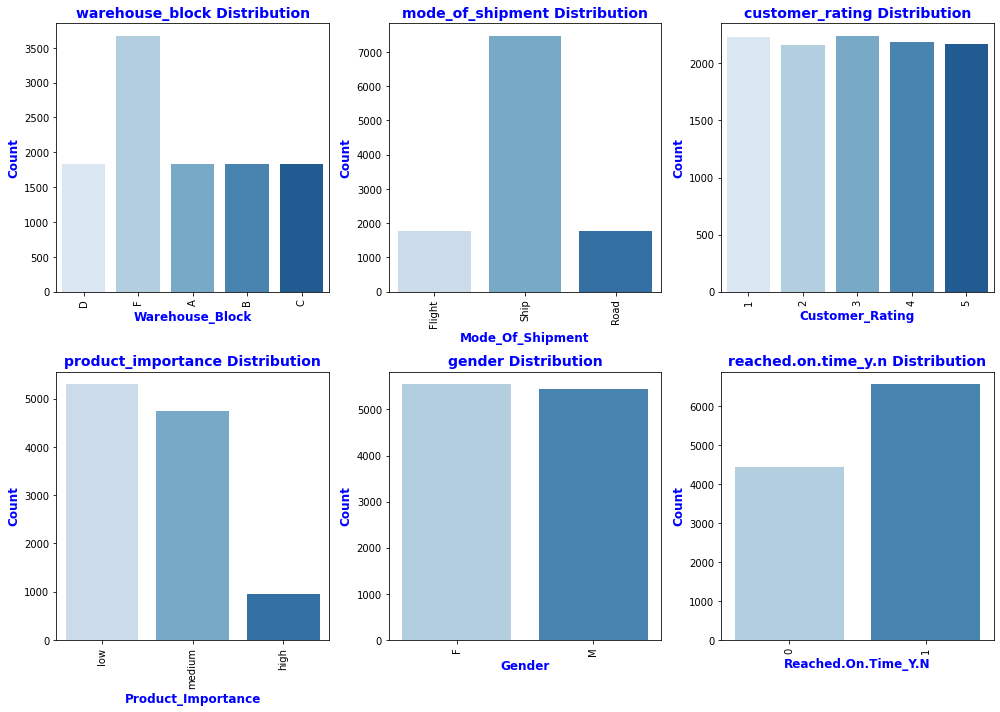

In [14]:
#Select columns to visualize using count plot
select_cols =['warehouse_block','mode_of_shipment', 'customer_rating','product_importance','gender','reached.on.time_y.n']
#Count plot for the selected columns
countplot_grid(data=df, selected_columns=select_cols, ncols=3)

### *General Observations*
* *Warehouse block:* It appears the company does more dispatches through block F than other blocks
* *Mode of shipment:* The company moves more shipments through the ship(by sea), this can be explained by the fact that haulage capacity of ship is higher.
* *Customer rating:* The company deliveries received average ratings in all levels
* *Product importance:* Company dispatched more shipments of low importance, followed by medium and high respectively
* *Gender:* Generally the company serviced orders from both genders which were more or less at bar
* *Reached on Time:* Company was able to deliver more orders on time than delayed.

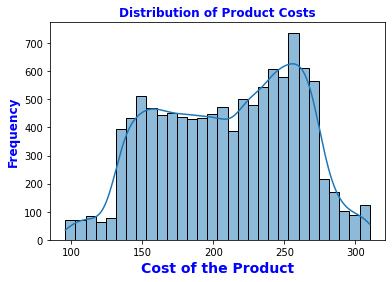

In [15]:
#Histogram plot of cost of the product variable
sns.histplot(df['cost_of_the_product'], kde=True, bins='auto',palette= 'Blues')
#labels and title
plt.xlabel('Cost of the Product',size=14, color='blue', weight='bold')
plt.ylabel('Frequency', size=12, color='blue', weight='bold')
plt.title('Distribution of Product Costs', size=12, color='blue', weight='bold')
plt.show()

### *Observations*

The distribution of cost of the product feature exhibits bi-modal kind of distribution with most products averagely costing around 250 usd.

### Quiz 1. What are the main factors contributing to shipping delays?

To effectively answer the above, the data needs to be subset into 'On Time' and 'Delayed' and focus the later.

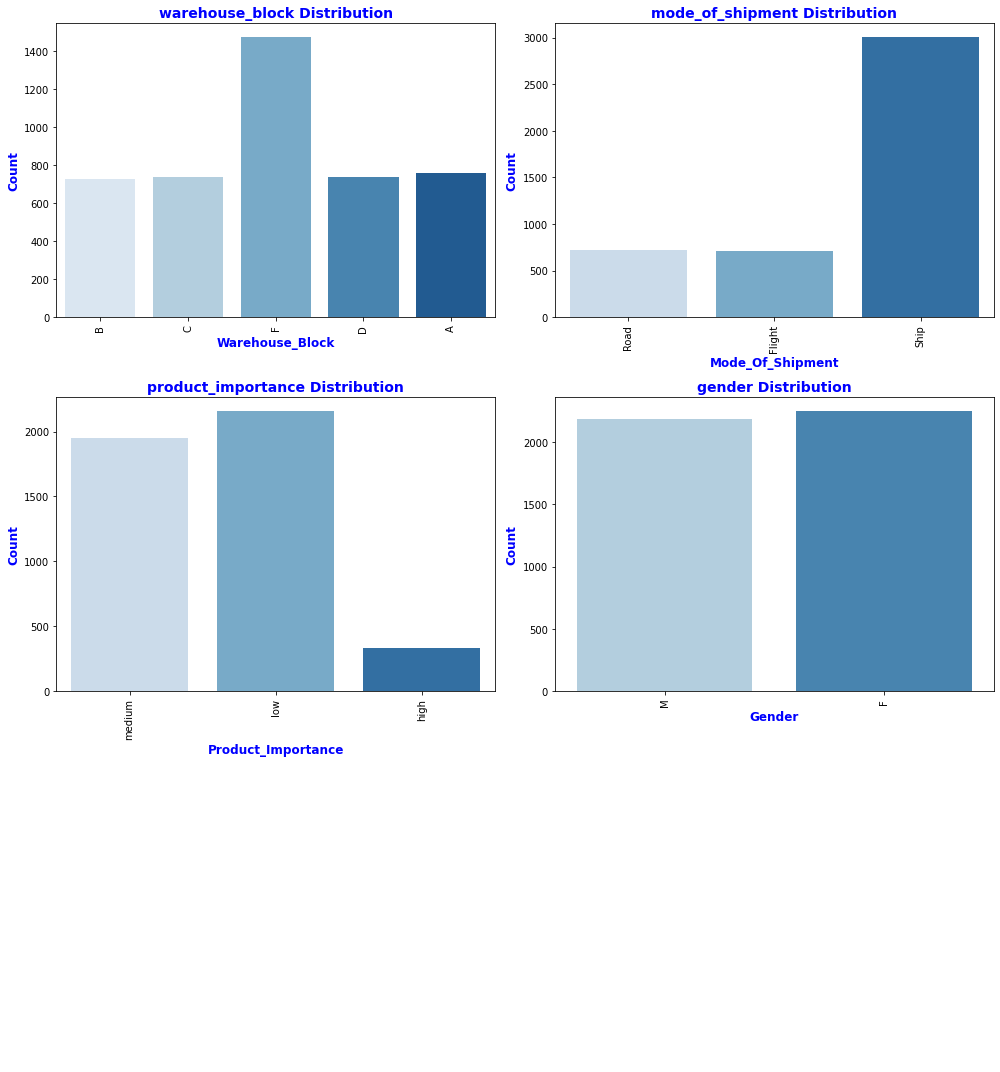

In [16]:
#Subset delayed from df dataset
delayed = df[df["reached.on.time_y.n"]==0].copy()

#Selected columns
select_delay_columns = ['warehouse_block','mode_of_shipment','product_importance','gender']

#Count plot for the selected features of delayed subset
countplot_grid(data=delayed, selected_columns=select_delay_columns, ncols=2)


### *Observations:*

The factors that highly contributed to the delay in delivery timelines included;
* *Warehouse block,* majority of the dispatches that ended up being delayed originated fro block F
* *Mode of shipment,* movement of shipment by sea(ship) resulted in delays; possibly due to speed of ships which is lower.
* *Product importance,* product categories of low and medium shipped/ordered delayed
* *Gender,* there seem to be no much difference on shipments delivered off-time potrayed by either gender

# 5.2 Bivariate Analysis

This is the analysis of data to identify patterns, trends, and correlations of two variables in a given dataset. This can be achieved by use of bar plots, scatter plots, correlation coefficient and regression analysis

### Quiz 2. How do customer demographics and product preferences influence delivery experiences?

* What effects does various customer ratings and their product preferences affect delivery times ?


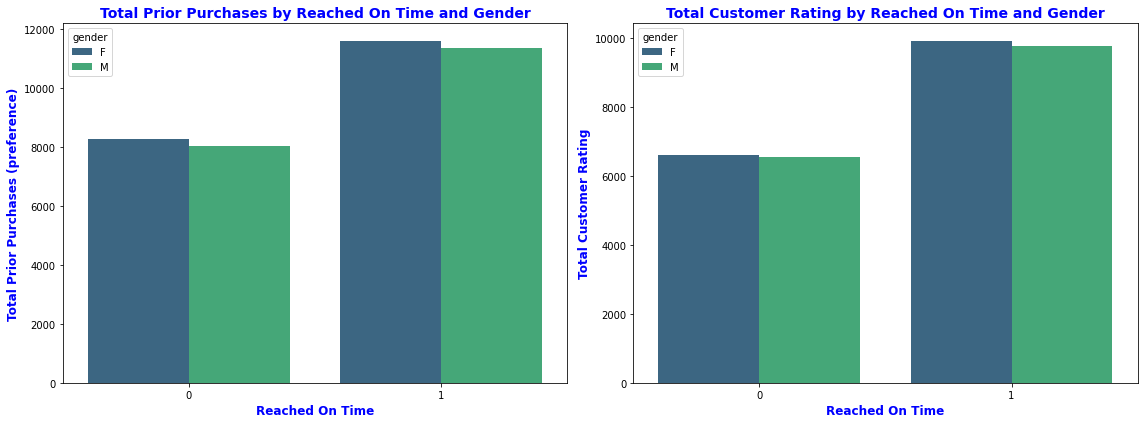

In [17]:
#Subset dataset on prior purchases(order volumes) and customer ratings and groupby delivery time and gender
grouped_purchases = df.groupby(['reached.on.time_y.n', 'gender'])['prior_purchases'].sum().reset_index()
grouped_purchases.sort_values(by='gender')

grouped_ratings = df.groupby(['reached.on.time_y.n', 'gender'])['customer_rating'].sum().reset_index()
grouped_ratings.sort_values(by='gender')

#Visualization of the relationships of variables in grouped subset
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the Prior Purchases
sns.barplot(data=grouped_purchases, x='reached.on.time_y.n', y='prior_purchases', hue='gender', ax=axes[0], palette='viridis')
axes[0].set_title('Total Prior Purchases by Reached On Time and Gender',size=14, color='blue', weight='bold')
axes[0].set_xlabel('Reached On Time',size=12, color='blue', weight='bold')
axes[0].set_ylabel('Total Prior Purchases (preference)',size=12, color='blue', weight='bold')

# Plot the Customer Rating
sns.barplot(data=grouped_ratings, x='reached.on.time_y.n', y='customer_rating', hue='gender', ax=axes[1], palette='viridis')
axes[1].set_title('Total Customer Rating by Reached On Time and Gender',size=14, color='blue', weight='bold')
axes[1].set_xlabel('Reached On Time',size=12, color='blue', weight='bold')
axes[1].set_ylabel('Total Customer Rating',size=12, color='blue', weight='bold')

# Adjust layout 
plt.tight_layout()
plt.show()

### *Observations*
* Both genders exhibit same trend on levels of prior puchases and ratings, though females seem to have made sligthly more purchases than males. 
* The higher the customer ratings and prior purchases(product preferences) for both genders led to delivery on time.
* Higher customer preference and ratings possibly is as a result of being satisfied with delivery service.


# 5.3 Multivariate Analysis

Multivariate analysis is a statistical technique used to describe and summarize patterns, trends, and correlations between three or more variables. It is achieved by deployement of various analysis techniques such as ;

* Multiple regression analysis

* Factor analysis

* Cluster analysis

* Discriminant analysis

### Quiz 3. How can we reduce shipping costs while maintaining or improving service levels?

* Which shipping methods and routes are most cost-effective?


The effectively answer, the dataset is subset to those deliveries that were 'on time' and focus on the shipping mode and routes(warehouse block) where the discount offered(cost to the company) is lowest.

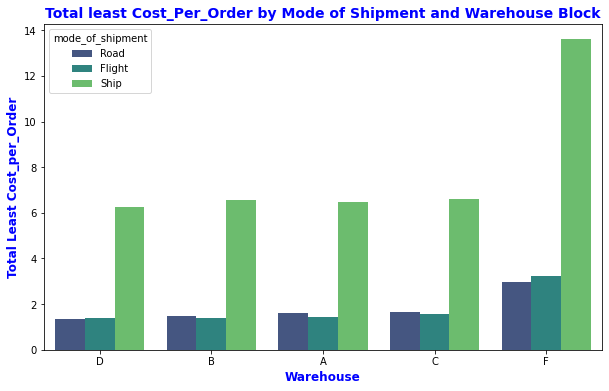

Warehouse Block: D, Mode of Shipment: Road
Warehouse Block: B, Mode of Shipment: Flight
Warehouse Block: D, Mode of Shipment: Flight


In [18]:
#Subset dataset to 'reached.on.time_y.n'==1
on_time = df[df['reached.on.time_y.n']==1]

#Engineer cost per order feature(discount_offered / weight_in_gms)
on_time["cost_per_order"] = on_time['discount_offered'] / on_time['weight_in_gms']

#Groupby Mode of shipping and warehouse block where cost per order is the least.
grouped_on_time = on_time.groupby(['warehouse_block', 'mode_of_shipment'])['cost_per_order'].sum().reset_index()
sorted_grouped_on_time = grouped_on_time.sort_values(by="cost_per_order", ascending=True)

#Visualization using barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_grouped_on_time, x='warehouse_block', y='cost_per_order', hue='mode_of_shipment', palette='viridis')

# Add labels and title
plt.title('Total least Cost_Per_Order by Mode of Shipment and Warehouse Block', fontsize=14, color="blue", weight='bold')
plt.xlabel('Warehouse', fontsize=12, color="blue", weight='bold')
plt.ylabel('Total Least Cost_per_Order', fontsize=12, color="blue", weight='bold')
plt.show()

#Top three(3)cost effective routes
top_3_routes = sorted_grouped_on_time.head(3)
for index, row in top_3_routes.iterrows():
    print(f"Warehouse Block: {row['warehouse_block']}, Mode of Shipment: {row['mode_of_shipment']}")

### *Observations*
* Shipment by Road and Flight are generally the cost effective modes of shipment where the company incurred the least rate in incentizing sale.
* Cost effective routes is by shipment through all warehouse blocks except block F
* The top three cost effective routes is shipping through block D by Road, block B by Flight and block D by Flight respectively.

# 6.0 Modelling

### Loading required libraries and preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,accuracy_score,auc,precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Preprocessing of dataset; perform transformations for modelling

In [20]:
#Transform categorical features using onehotencode
df_encoded = pd.get_dummies(df, drop_first=True, dtype=float)

#Predictors and target variables
X = df_encoded.drop(['reached.on.time_y.n'], axis=1)
y = df_encoded['reached.on.time_y.n']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Base model:

Logistic Regression Model

In [21]:
#Vanilla logistic regression model
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

Accuracy: 63.52%
Mean Squared Error: 0.3648
AUC: 0.71


### *Observation*
* The base model performs at an accuracy of 63.52%, with mean squared error 0.36 and area under the curve AUC 0.71
* Other models that will out-performs this base model is better and chosen for prediction

### Random Forest Model

In [22]:
#Random Forest model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
# Get the predicted probabilities for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

Accuracy: 66.06%
Mean Squared Error: 0.3394
AUC: 0.74


### *Observations*
* The Random Forest model performs at an accuracy of 66.06%, with MSE of 0.34 and AUC of 0.74
* This model is performing better than base model-logistic regression model

### Decision Tree Model

In [23]:
#Decision Tree model
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
# Get the predicted probabilities for the positive class
y_prob = dt_model.predict_proba(X_test)[:, 1]
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

Accuracy: 64.76%
Mean Squared Error: 0.3524
AUC: 0.63


### *Observations*
* The Random Forest model performs at an accuracy of 64.76%, with MSE of 0.35 and AUC of 0.63
* This model is performing better than base model-logistic regression model but not as good as Random Forest model.
* The best model therefore, is Random Forest Model
* The models can be further optimized and evaluated

## 6.1 Optimized Models

### 6.1.1.Standardize data using StandardScaler, re-model and evaluate their performances

In [24]:
#Model optimization
#Standardize data and compare models

# Apply Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
dt_model_scaled = DecisionTreeClassifier(random_state=42)
rf_model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model_scaled = LogisticRegression(random_state=42)

# Train the models
dt_model_scaled.fit(X_train_scaled, y_train)
rf_model_scaled.fit(X_train_scaled, y_train)
lr_model_scaled.fit(X_train_scaled, y_train)

# List of models to evaluate
models = [lr_model_scaled, rf_model_scaled, dt_model_scaled]
model_names = ["Logistic Regression","Random Forest","Decision Tree"]

# Initialize dictionaries to store results
accuracy_scores = {}
mse_scores = {}
auc_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Loop through each model and evaluate
for model, name in zip(models, model_names):
    # Make predictions
    pred = model.predict(X_test_scaled)
    
    # Calculate Accuracy
    accuracy_scores[name] = accuracy_score(y_test, pred)
    
    # Calculate MSE (Mean Squared Error)
    mse_scores[name] = mean_squared_error(y_test, pred)
    
    # Calculate AUC (Area Under the Curve) for binary classification
    pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probability for positive class 
    auc_scores[name] = roc_auc_score(y_test, pred_proba)
    # Calculate Precision
    precision_scores[name] = precision_score(y_test, pred)
    
    # Calculate Recall
    recall_scores[name] = recall_score(y_test, pred)
    
    # Calculate F1 Score
    f1_scores[name] = f1_score(y_test, pred)

# Print the evaluation results
print("Model Performance Evaluation:")
for name in model_names:
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy_scores[name]* 100:.2f}%")
    print(f"  MSE: {mse_scores[name]:.4f}")
    print(f"  AUC: {auc_scores[name]* 100:.2f}%")
    print(f"  Precision: {precision_scores[name]:.4f}")
    print(f"  Recall: {recall_scores[name]:.4f}")
    print(f"  F1 Score: {f1_scores[name]:.4f}")


Model Performance Evaluation:

Logistic Regression:
  Accuracy: 63.64%
  MSE: 0.3636
  AUC: 71.81%
  Precision: 0.7054
  Recall: 0.6806
  F1 Score: 0.6928

Random Forest:
  Accuracy: 66.03%
  MSE: 0.3397
  AUC: 73.67%
  Precision: 0.7585
  Recall: 0.6398
  F1 Score: 0.6941

Decision Tree:
  Accuracy: 64.58%
  MSE: 0.3542
  AUC: 62.94%
  Precision: 0.7046
  Recall: 0.7093
  F1 Score: 0.7069


### *Observations*
* Standardizing data values do not result in any significant differences in the mode performance

### 6.1.2. Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
dt_param_grid = {
     'max_depth': [3, 5, 10, None],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4],
     'criterion': ['gini', 'entropy']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

lr_param_grid = {
     'C': [0.1, 1, 10, 100],
     'solver': ['liblinear', 'saga', 'lbfgs'],
     'penalty': ['l2', 'l1']
 }

# Initialize GridSearchCV for each model
dt_grid_search = GridSearchCV(dt_model_scaled, dt_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search = GridSearchCV(rf_model_scaled, rf_param_grid, cv=5, n_jobs=-1, verbose=2)
lr_grid_search = GridSearchCV(lr_model_scaled, lr_param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the models
dt_grid_search.fit(X_train_scaled, y_train)
rf_grid_search.fit(X_train_scaled, y_train)
lr_grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")

# Get the best models from GridSearchCV
best_dt_model = dt_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_
best_lr_model = lr_grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


### 6.1.3. Model with best hyperparameters and evaluate

In [26]:
# Create the models with the best parameters
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

lr_model = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='liblinear',
    random_state=42
)

# Train each model
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
lr_pred = lr_model.predict(X_test_scaled)

# For AUC, we need probabilities (for binary classification)
dt_pred_proba = dt_model.predict_proba(X_test_scaled)[:, 1]
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate each model
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "AUC": roc_auc_score
}

print("Model Performance Evaluation:")
for model, name, pred, pred_proba in zip(
    [dt_model, rf_model, lr_model], 
    ["Decision Tree", "Random Forest", "Logistic Regression"], 
    [dt_pred, rf_pred, lr_pred], 
    [dt_pred_proba, rf_pred_proba, lr_pred_proba]
):
    print(f"\n{name}:")
    for metric_name, metric_function in metrics.items():
        if metric_name == "AUC":
            score = metric_function(y_test, pred_proba)
        else:
            score = metric_function(y_test, pred)
        print(f"  {metric_name}: {score:.4f}")

Model Performance Evaluation:

Decision Tree:
  Accuracy: 0.6852
  Precision: 0.9052
  Recall: 0.5332
  F1 Score: 0.6711
  AUC: 0.7521

Random Forest:
  Accuracy: 0.6752
  Precision: 0.8418
  Recall: 0.5674
  F1 Score: 0.6779
  AUC: 0.7370

Logistic Regression:
  Accuracy: 0.6364
  Precision: 0.7080
  Recall: 0.6745
  F1 Score: 0.6909
  AUC: 0.7189


### *Observations*
* After tuning of models, Decision Tree model has performed at accuracy of 68.52%, precision of 90.52% and AUC of  0.7521 better than Random Forest that is performing at an 67.52%, 84.18% and 0.7370 respectively.

### 6.1.4 Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

# Cross-validation for each model
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.4f}")
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")
print(f"Logistic Regression Cross-Validation Accuracy: {lr_cv_scores.mean():.4f}")

Decision Tree Cross-Validation Accuracy: 0.6848
Random Forest Cross-Validation Accuracy: 0.6770
Logistic Regression Cross-Validation Accuracy: 0.6392


### *Observation*

Decision Tree classification model is the best perfroming, hence best choice to deploy for predicting future delivery timelines by the company

# 7.0 Conclusions and Recommendations

## 7.1 Conclusions

### Main factors contributing to shipping delays
* *Warehouse block,* majority of the dispatches that ended up being delayed originated fro block F
* *Mode of shipment,* movement of shipment by sea(ship) resulted in delays; possibly due to speed of ships which is lower.
* *Product importance,* product categories of low and medium shipped/ordered delayed

### Customer demographics and product preferences influencing delivery experiences
* Both genders exhibit same trend on levels of prior puchases and ratings, though females seem to have made sligthly more purchases than males. 
* Higher customer preference and ratings possibly is as a result of being satisfied with delivery service.

### Cost effective shipping mode and routes
* Shipment by Road and Flight are generally the cost effective modes of shipment where the company incurred the least rate in incentizing sale.
* Cost effective routes is by shipment through all warehouse blocks except block F
* The top three cost effective routes is shipping through block D by Road, block B by Flight and block D by Flight respectively.

### Best predictive model to deploy
* An optimized Decision Tree Classification model

## 7.2 Recommendations
* Optimize warehouse operations especially block F as it is major source of delays
* Improve on performance of sea shipment or explore faster modes like road or air.
* Based on anlysis of the data, the company to maintain and expand the most cost effective shipping modes and routes
* Deploy Decision Tree Model to forecast delays and improve on route decisions